In [1]:
import pickle
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [13, 10]

In [2]:
def read_data(fn):
    data = pd.read_pickle(fn)
    print("bad: ", sum(data["cer"] == -1), ", all: ", len(data))
    data = data[data["cer"] != -1]
    data = data[data["cer"] < 1.0]
    return data

In [3]:
def get_epoch(e, data):
    mi = min(np.where(data.epoch == e)[0])
    ma = max(np.where(data.epoch == e)[0])
    return mi, ma

In [4]:
def plot_var_with_epochs(data, var, epochs):
    plt.plot(list(range(len(data))), data[var])
    for i in range(len(epochs)):
        e = epochs[i]
        col = ["b", "g", "r", "c", "y", "m", "k", "w"][i]
        plt.axvspan(e[0], e[1], facecolor = col, alpha=0.3)
    plt.show()

### Do stuff for large image size

In [5]:
data_large = read_data("../modeling/tf_output/img_size/big/online_metrics0.pkl")
epochs_large = [get_epoch(e, data_large) for e in range(5)]

bad:  782 , all:  3770


In [6]:
data_large[data_large["epoch"] == 4]["cer"].mean()

0.20546775642645398

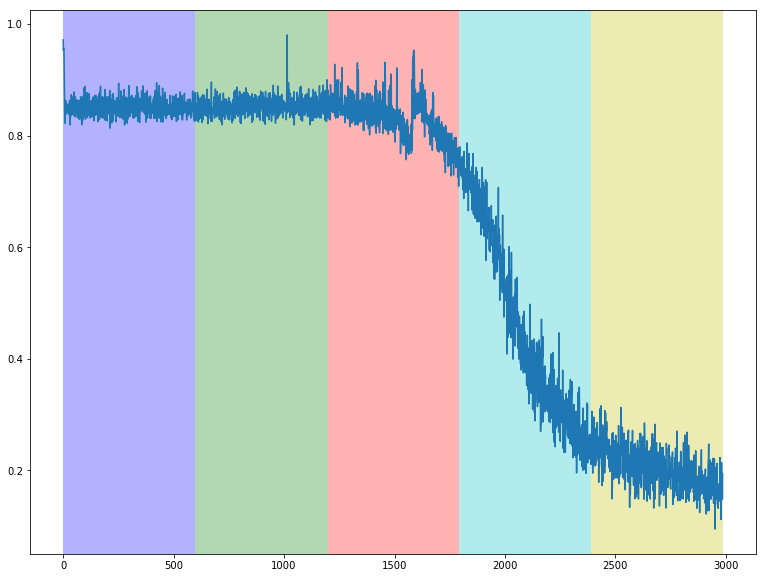

In [7]:
plot_var_with_epochs(data_large, "cer", epochs_large)

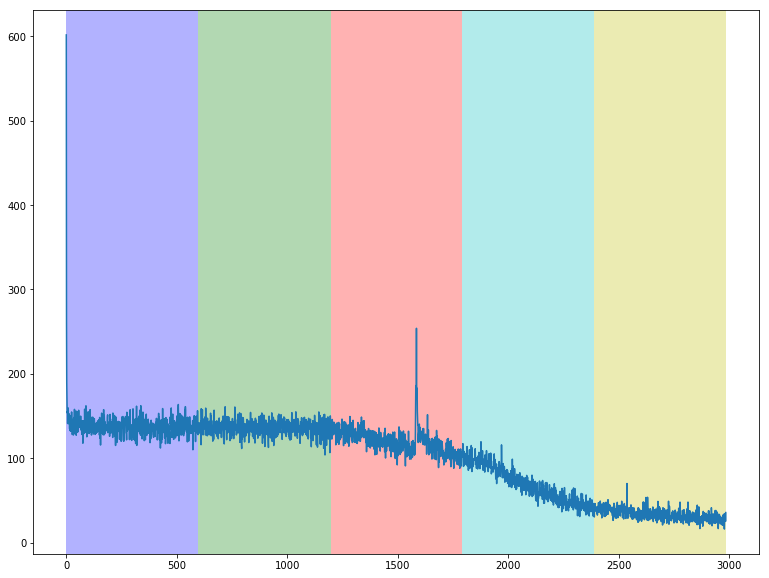

In [8]:
plot_var_with_epochs(data_large, "loss", epochs_large)

### Do stuff for small image size

In [9]:
data_small = read_data("../modeling/tf_output/img_size/small/online_metrics0.pkl")
epochs_small = [get_epoch(e, data_small) for e in range(5)]

bad:  0 , all:  3770


In [10]:
data_small[data_small["epoch"] == 4]["cer"].mean()

0.09657719731330872

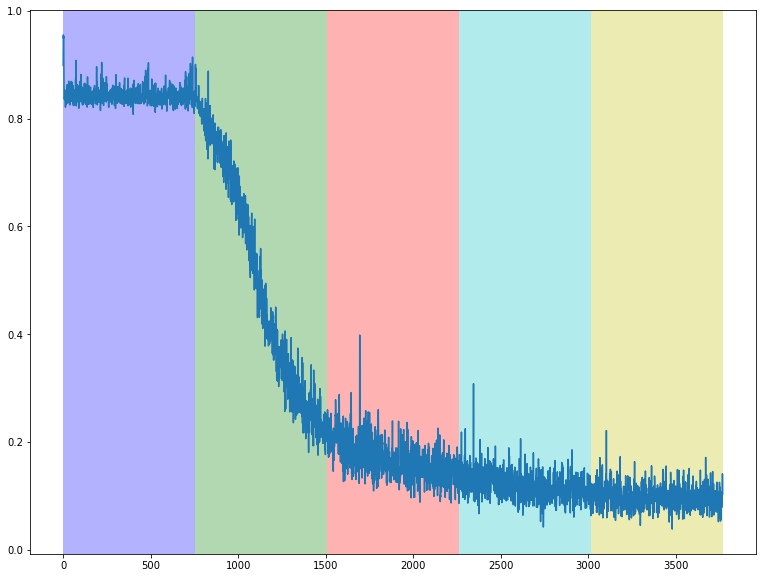

In [11]:
plot_var_with_epochs(data_small, "cer", epochs_small)

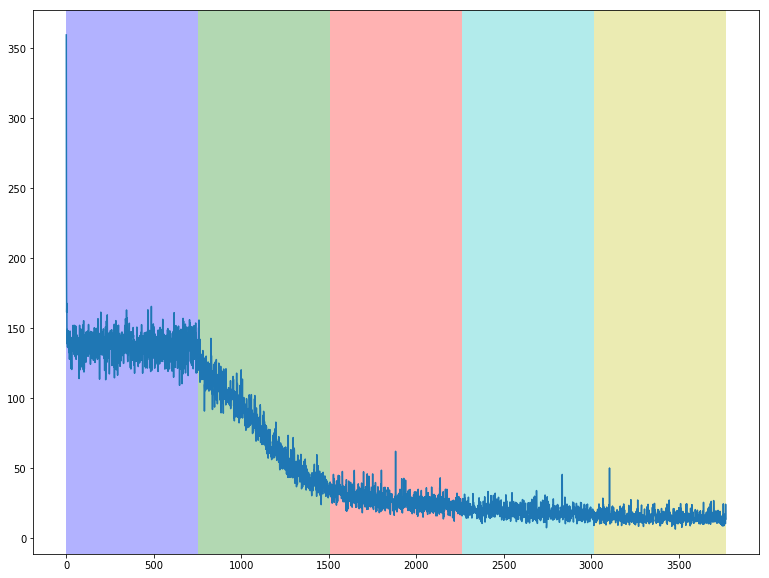

In [12]:
plot_var_with_epochs(data_small, "loss", epochs_small)

### Do stuff for smallest image size

In [13]:
data_smallest = read_data("../modeling/tf_output/img_size/smallest/online_metrics0.pkl")
epochs_smallest = [get_epoch(e, data_smallest) for e in range(5)]

bad:  0 , all:  3770


In [14]:
data_smallest[data_smallest["epoch"] == 4]["cer"].mean()

0.10248050838708878

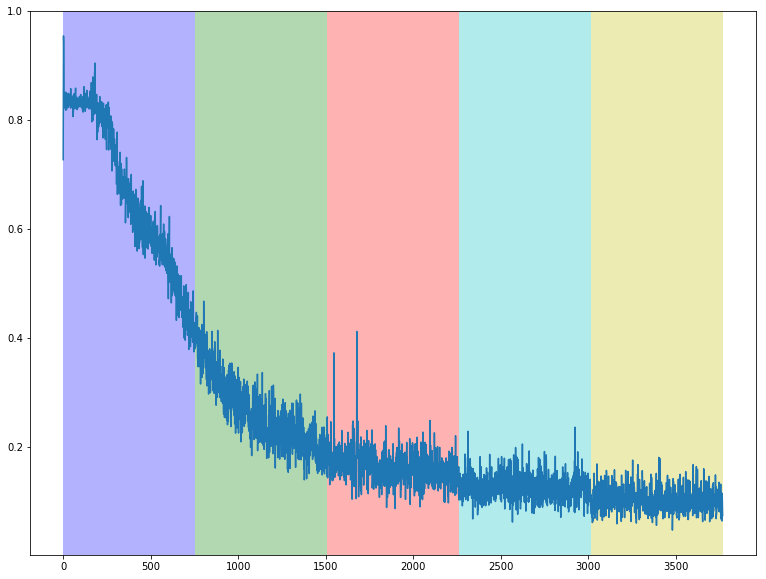

In [15]:
plot_var_with_epochs(data_smallest, "cer", epochs_smallest)

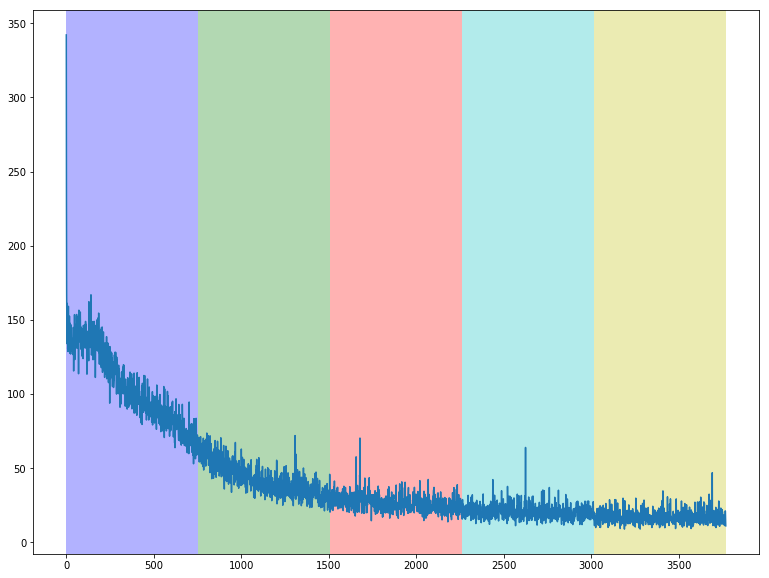

In [16]:
plot_var_with_epochs(data_smallest, "loss", epochs_smallest)